In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# loading the data 
sales_data = pd.read_csv('/content/Train (1).csv')
#checking the first 5 rows of the dataframe
sales_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
sales_data.shape

(8523, 12)

In [4]:
# getting some information about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
sales_data['Item_Weight'].mean()

12.857645184135976

In [7]:
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)

In [8]:
sales_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [11]:
mode_of_Outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [9]:
miss_values = sales_data['Outlet_Size'].isnull()

In [12]:
sales_data.loc[miss_values, 'Outlet_Size'] = sales_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [13]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
sales_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [15]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
encoder = LabelEncoder()

In [17]:
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])

sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])

sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])

sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])

sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])

sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

In [18]:
sales_data.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 1         0.016047          4   
1                8         5.92                 2         0.019278         14   
2              662        17.50                 1         0.016760         10   
3             1121        19.20                 2         0.000000          6   
4             1297         8.93                 1         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            2   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1          3735.1380  
1                     2            2           443.4228  
2                     0            1          2097.2700  
3                     2            0           732.3800  
4                     2            1           994.7052

In [20]:
#Let's have all the features in X & target in Y
X = sales_data.drop(columns='Item_Outlet_Sales', axis=1)
y = sales_data['Item_Outlet_Sales']

In [21]:
X.shape

(8523, 11)

In [22]:
y.shape

(8523,)

In [23]:
x_train = X.iloc[0:6822] # 80%
x_test = X.iloc[6822:] # 20%
y_train = y.iloc[0:6822] # 80%
y_test = y.iloc[6822:] # 20%
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6822, 11)
(1701, 11)
(6822,)
(1701,)


In [25]:
x_train.head(100)

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               156     9.300000                 1         0.016047   
1                 8     5.920000                 2         0.019278   
2               662    17.500000                 1         0.016760   
3              1121    19.200000                 2         0.000000   
4              1297     8.930000                 1         0.000000   
..              ...          ...               ...              ...   
95              970    12.857645                 1         0.009715   
96              382    12.150000                 1         0.131384   
97              231     8.750000                 2         0.074613   
98             1442    12.857645                 1         0.028460   
99              231     8.750000                 2         0.074627   

    Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0           4  249.8092                  9                       1999   
1          14   48.2692                  3                       2009   
2          10  141.6180                  9                       1999   
3           6  182.0950                  0                       1998   
4           9   53.8614                  1                       1987   
..        ...       ...                ...                        ...   
95          5  120.0414                  4                       1985   
96          5  246.0460                  9                       1999   
97          6  187.4556                  6                       2004   
98          9  149.9708                  5                       1985   
99          6  187.8556                  8                       1997   

    Outlet_Size  Outlet_Location_Type  Outlet_Type  
0             1                     0            1  
1             1                     2            2  
2             1                     0            1  
3             2                     2            0  
4             0                     2            1  
..          ...                   ...          ...  
95            2                     0            0  
96            1                     0            1  
97            2                     1            1  
98            1                     2            3  
99            2                     0            1  

[100 rows x 11 columns]

In [26]:
import numpy as np

x_train = np.asarray(x_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [27]:
mea = np.mean(x_train,axis = 0)
std = np.std(x_train,axis = 0)
x_train = (x_train-mea)/std
x_test = (x_test-mea)/std

In [28]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

LSTM starts

In [29]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1,activation = "linear"))

	model.compile(loss=params["loss"],
              	optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [30]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"lstm_units": 138,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = get_model(params=params, input_shape=x_train.shape[1])

In [31]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

In [32]:
history = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

Epoch 1/100
54/54 [==============================] - 16s 44ms/step - loss: 7577719.5000 - root_mean_squared_error: 2752.7656 - mean_absolute_error: 2164.3787 - val_loss: 7509493.5000 - val_root_mean_squared_error: 2740.3455 - val_mean_absolute_error: 2127.0269
Epoch 2/100
54/54 [==============================] - 1s 13ms/step - loss: 7475255.0000 - root_mean_squared_error: 2734.0913 - mean_absolute_error: 2140.6055 - val_loss: 7414944.5000 - val_root_mean_squared_error: 2723.0396 - val_mean_absolute_error: 2104.8782
Epoch 3/100
54/54 [==============================] - 1s 13ms/step - loss: 7381068.5000 - root_mean_squared_error: 2716.8123 - mean_absolute_error: 2118.8225 - val_loss: 7323500.0000 - val_root_mean_squared_error: 2706.1965 - val_mean_absolute_error: 2083.4045
Epoch 4/100
54/54 [==============================] - 1s 13ms/step - loss: 7289398.0000 - root_mean_squared_error: 2699.8884 - mean_absolute_error: 2097.3909 - val_loss: 7234182.0000 - val_root_mean_squared_error: 2689.6

In [33]:
print(history.history)

{'loss': [7577719.5, 7475255.0, 7381068.5, 7289398.0, 7200038.5, 7112500.0, 7027101.5, 6942573.0, 6859596.0, 6776981.0, 6696230.0, 6615838.0, 6537677.0, 6461406.0, 6385605.0, 6310826.0, 6236666.0, 6165718.0, 6092787.5, 6022869.5, 5956285.5, 5885079.5, 5818481.5, 5753522.5, 5686863.5, 5624697.0, 5560925.0, 5500818.5, 5440152.0, 5376038.5, 5321145.5, 5261349.0, 5206067.5, 5148239.0, 5093503.5, 5039876.5, 4986226.0, 4933400.5, 4882475.0, 4833510.5, 4782876.0, 4733188.5, 4686400.0, 4638122.5, 4589834.0, 4544165.5, 4497712.5, 4455168.0, 4413501.0, 4369424.5, 4327036.0, 4285479.5, 4242490.0, 4209674.0, 4170217.75, 4134707.0, 4094301.5, 4058121.5, 4029567.5, 3988656.75, 3954745.25, 3920058.25, 3887030.25, 3858185.5, 3823279.75, 3793471.25, 3763555.75, 3735356.25, 3706425.75, 3675966.25, 3647638.0, 3621136.5, 3599468.75, 3568937.5, 3544454.25, 3523186.5, 3495240.0, 3475447.0, 3454513.5, 3428552.5, 3409663.25, 3392282.25, 3372004.5, 3348269.75, 3337187.5, 3318392.5, 3296088.0, 3280975.75, 32634

In [34]:
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']

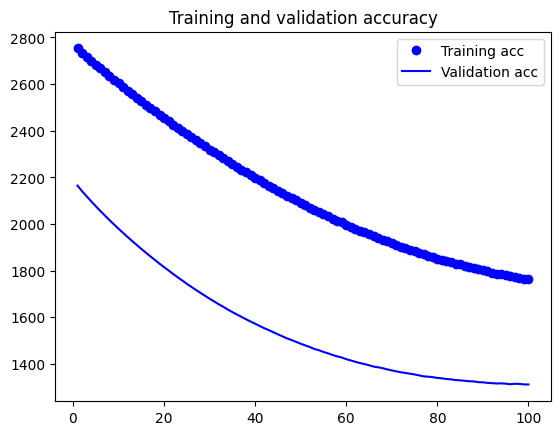

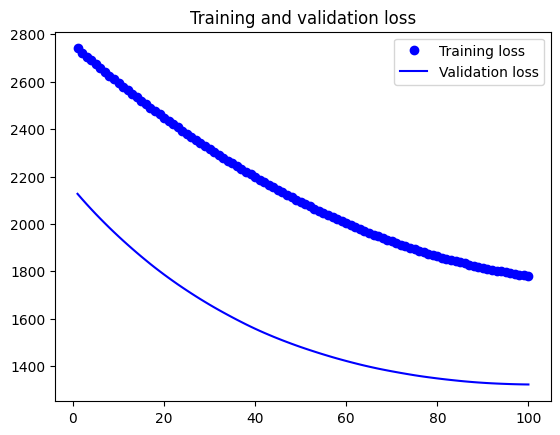

In [35]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

GRU

In [36]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import GRU
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [37]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(GRU(units=params["gru_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(GRU(units=params["gru_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(GRU(units=params["gru_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(GRU(units=params["gru_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1,activation = "linear"))

	model.compile(loss=params["loss"],
              	optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [38]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"gru_units": 138,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = get_model(params=params, input_shape=x_train.shape[1])

In [39]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

In [41]:
history = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

Epoch 1/100
54/54 [==============================] - 1s 15ms/step - loss: 3351193.2500 - root_mean_squared_error: 1830.6265 - mean_absolute_error: 1331.2504 - val_loss: 3394685.2500 - val_root_mean_squared_error: 1842.4672 - val_mean_absolute_error: 1339.3284
Epoch 2/100
54/54 [==============================] - 2s 30ms/step - loss: 3326003.7500 - root_mean_squared_error: 1823.7334 - mean_absolute_error: 1328.3213 - val_loss: 3375847.5000 - val_root_mean_squared_error: 1837.3479 - val_mean_absolute_error: 1337.2668
Epoch 3/100
54/54 [==============================] - 2s 36ms/step - loss: 3319434.0000 - root_mean_squared_error: 1821.9314 - mean_absolute_error: 1328.3372 - val_loss: 3357444.7500 - val_root_mean_squared_error: 1832.3331 - val_mean_absolute_error: 1335.3468
Epoch 4/100
54/54 [==============================] - 1s 24ms/step - loss: 3289120.0000 - root_mean_squared_error: 1813.5931 - mean_absolute_error: 1323.8219 - val_loss: 3340405.5000 - val_root_mean_squared_error: 1827.67

In [42]:
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']

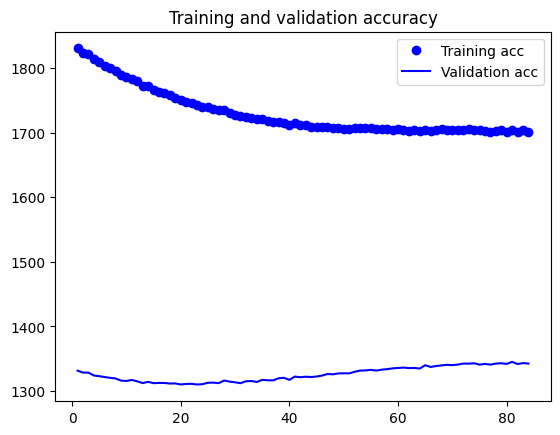

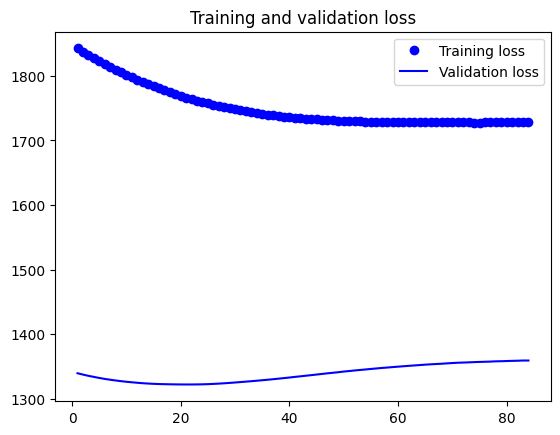

In [43]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

RNN

In [44]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [45]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(SimpleRNN(units=params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1,activation = "linear"))

	model.compile(loss=params["loss"],
              	optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [46]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"lstm_units": 138,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = get_model(params=params, input_shape=x_train.shape[1])

In [47]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])

In [48]:
history = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

Epoch 1/100
54/54 [==============================] - 11s 107ms/step - loss: 7572744.5000 - root_mean_squared_error: 2751.8621 - mean_absolute_error: 2163.2615 - val_loss: 7502360.5000 - val_root_mean_squared_error: 2739.0437 - val_mean_absolute_error: 2125.3528
Epoch 2/100
54/54 [==============================] - 3s 62ms/step - loss: 7466108.5000 - root_mean_squared_error: 2732.4180 - mean_absolute_error: 2138.4937 - val_loss: 7404257.5000 - val_root_mean_squared_error: 2721.0764 - val_mean_absolute_error: 2102.3733
Epoch 3/100
54/54 [==============================] - 3s 49ms/step - loss: 7368612.0000 - root_mean_squared_error: 2714.5188 - mean_absolute_error: 2115.7708 - val_loss: 7309195.0000 - val_root_mean_squared_error: 2703.5522 - val_mean_absolute_error: 2080.0593
Epoch 4/100
54/54 [==============================] - 3s 49ms/step - loss: 7274936.0000 - root_mean_squared_error: 2697.2090 - mean_absolute_error: 2093.7815 - val_loss: 7216923.0000 - val_root_mean_squared_error: 2686.

In [49]:
root_mean_squared_error = history.history['root_mean_squared_error']
mean_absolute_error = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_root_mean_squared_error = history.history['val_root_mean_squared_error']
val_mean_absolute_error = history.history['val_mean_absolute_error']

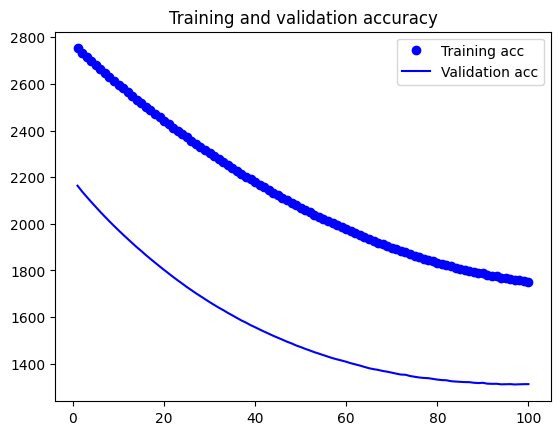

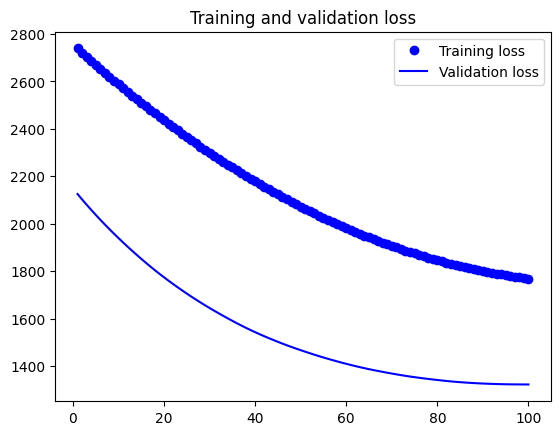

In [50]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

CNN

In [51]:
import tensorflow as tf
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

In [52]:
def CNN_model(params):
  
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                        strides=1, padding="causal",
                        activation="relu",
                        input_shape=[None, 1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=32,
                        strides=1, padding="causal",
                        activation="relu"),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1,activation = "linear")])
    #tf.keras.layers.Lambda(lambda x: x * 200)

  model.compile(loss=params["loss"],
              optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.003),
              metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
  
  return model


params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"epochs": 100,
	"batch_size": 128,
	"es_patience" : 10
}

model = CNN_model(params)

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', 
patience=params["es_patience"])


history_cnn = model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1, callbacks=[es_callback]
)

Epoch 1/100
54/54 [==============================] - 13s 32ms/step - loss: 7642199.0000 - root_mean_squared_error: 2763.7434 - mean_absolute_error: 2179.1455 - val_loss: 7604679.0000 - val_root_mean_squared_error: 2755.7305 - val_mean_absolute_error: 2149.2834
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 7605013.5000 - root_mean_squared_error: 2753.2483 - mean_absolute_error: 2170.6196 - val_loss: 7578341.5000 - val_root_mean_squared_error: 2750.9568 - val_mean_absolute_error: 2143.1477
Epoch 3/100
54/54 [==============================] - 1s 10ms/step - loss: 7579599.0000 - root_mean_squared_error: 2751.0144 - mean_absolute_error: 2164.7507 - val_loss: 7554060.5000 - val_root_mean_squared_error: 2746.5488 - val_mean_absolute_error: 2137.4751
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 7555554.5000 - root_mean_squared_error: 2748.1301 - mean_absolute_error: 2159.1890 - val_loss: 7530616.0000 - val_root_mean_squared_error: 2742.2

In [53]:
root_mean_squared_error = history_cnn.history['root_mean_squared_error']
mean_absolute_error = history_cnn.history['mean_absolute_error']
val_loss = history_cnn.history['val_loss']
val_root_mean_squared_error = history_cnn.history['val_root_mean_squared_error']
val_mean_absolute_error = history_cnn.history['val_mean_absolute_error']

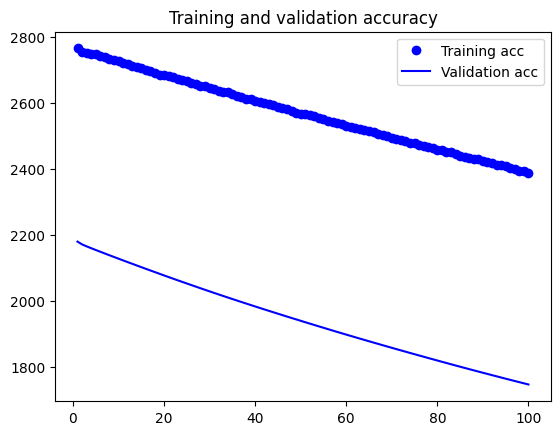

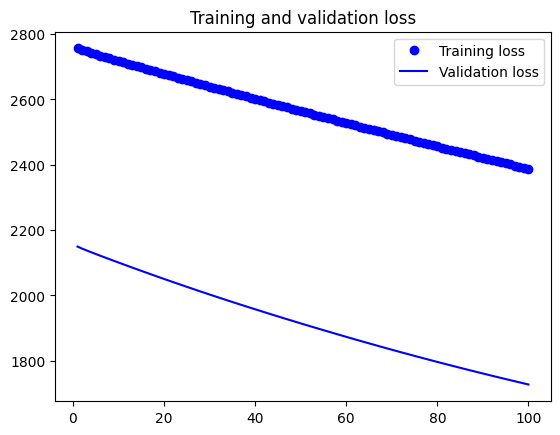

In [54]:
import matplotlib.pyplot as plt

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, root_mean_squared_error, 'bo', label='Training acc')
plt.plot(epochs, mean_absolute_error, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, val_root_mean_squared_error, 'bo', label='Training loss')
plt.plot(epochs, val_mean_absolute_error, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()